In [2]:
!pip install missingno

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import chardet as cha
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
train= pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\car_insurance_premium_dataset.csv')
test = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\car_insurance_premium_dataset_TEST.csv')
df = pd.concat([train, test], axis=0)

In [5]:
df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1100 non-null   int64  
 1   Driver Experience          1100 non-null   int64  
 2   Previous Accidents         1100 non-null   int64  
 3   Annual Mileage (x1000 km)  1100 non-null   int64  
 4   Car Manufacturing Year     1100 non-null   int64  
 5   Car Age                    1100 non-null   int64  
 6   Insurance Premium ($)      1100 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 68.8 KB


In [7]:
df.shape

(1100, 7)

In [8]:
df.describe()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.00000,1100.00000,1100.000000
mean,41.515455,14.659091,2.538182,17.931818,2007.67000,17.33000,493.736045
std,13.786977,10.524081,1.700879,4.413962,10.39656,10.39656,5.893454
min,18.000000,0.000000,0.000000,11.000000,1990.00000,0.00000,477.050000
25%,30.000000,6.000000,1.000000,14.000000,1999.00000,8.00000,489.537500
50%,42.000000,13.000000,3.000000,18.000000,2008.00000,17.00000,493.950000
75%,53.000000,23.000000,4.000000,22.000000,2017.00000,26.00000,498.200000
max,65.000000,40.000000,5.000000,25.000000,2025.00000,35.00000,508.300000


In [9]:
df.isnull().sum()

Driver Age                   0
Driver Experience            0
Previous Accidents           0
Annual Mileage (x1000 km)    0
Car Manufacturing Year       0
Car Age                      0
Insurance Premium ($)        0
dtype: int64

<Axes: >

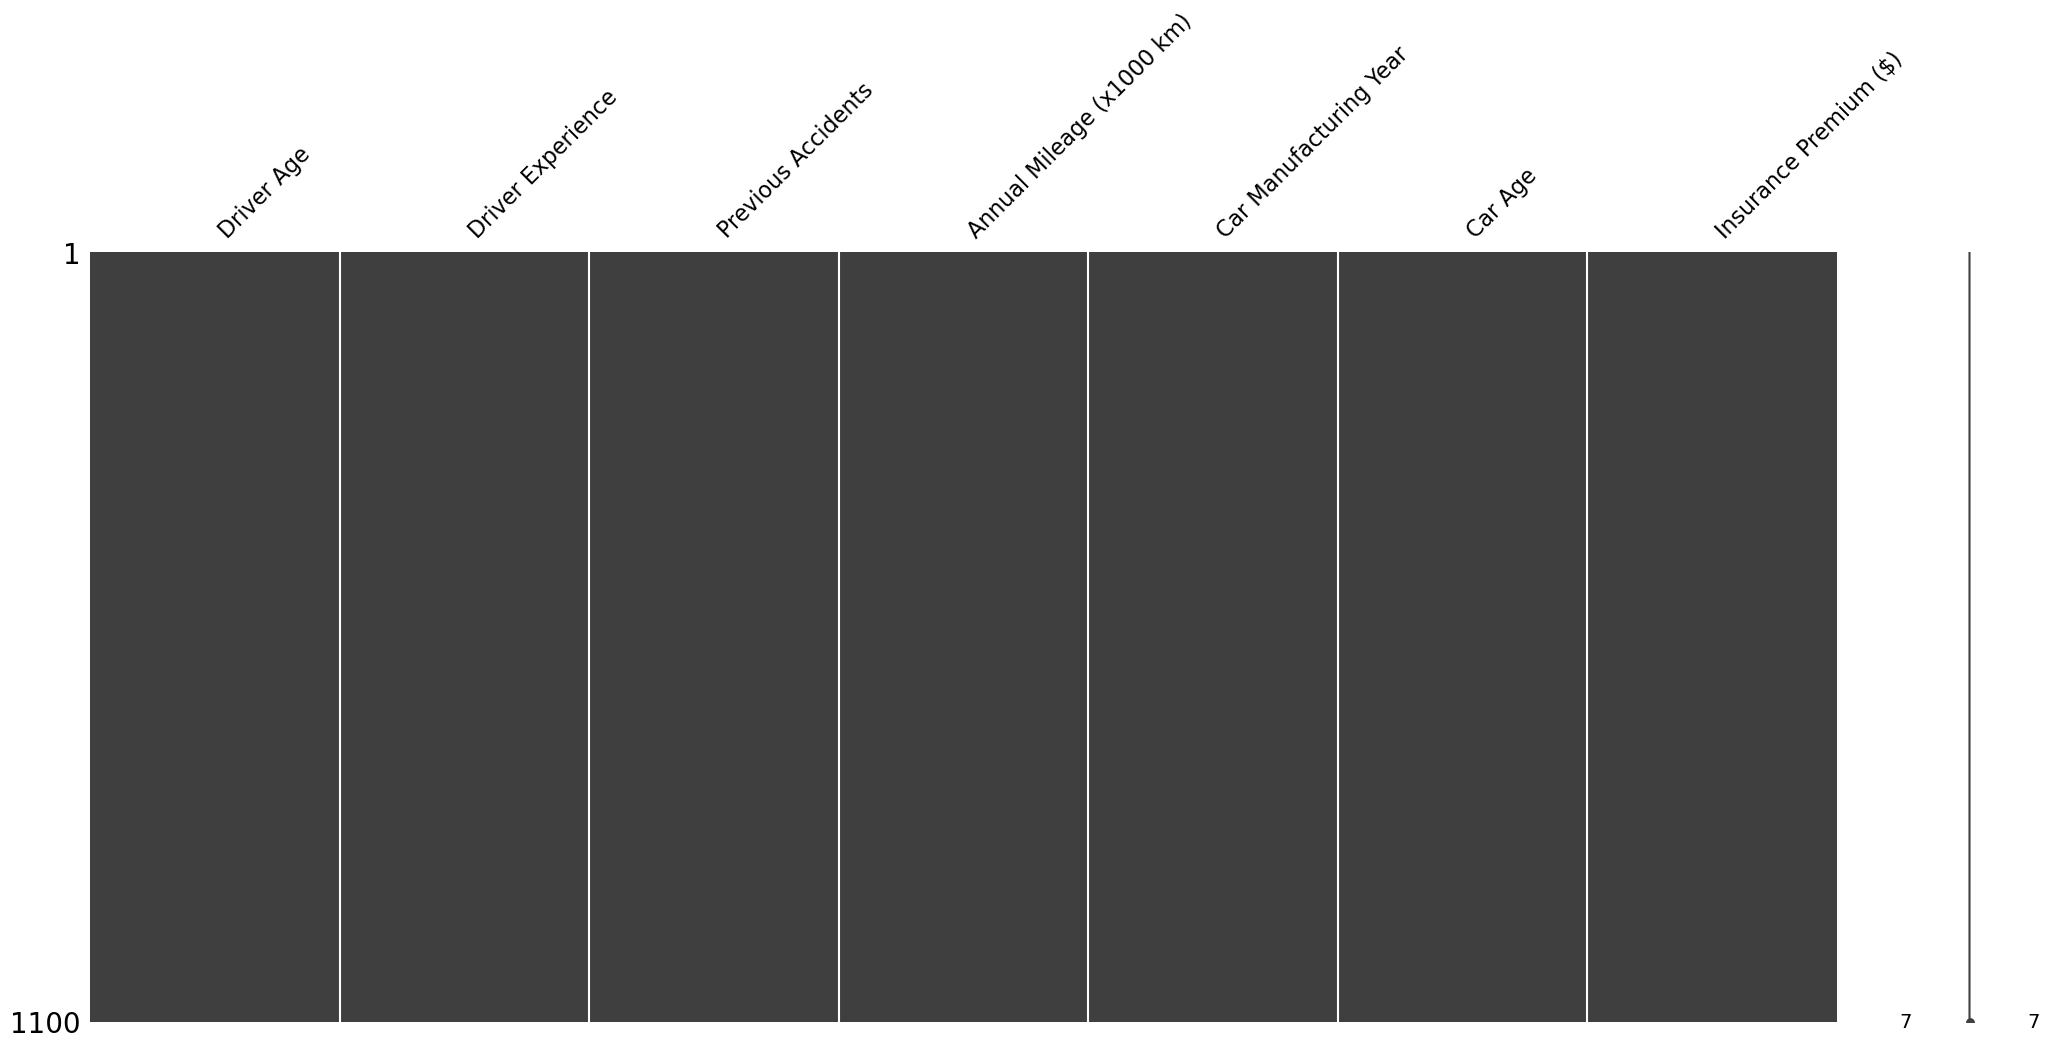

In [10]:
msno.matrix(df)

In [11]:
df.duplicated().sum()

0

In [12]:
df['Experience to Age Ratio'] = df['Driver Experience'] / (df['Driver Age'] + 1)
df['Accidents per Year of Experience'] = df['Previous Accidents'] / (df['Driver Experience'] + 1)

bins_age = [0, 25, 35, 45, 55, 65, 100]
labels_age = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Bracket'] = pd.cut(df['Driver Age'], bins=bins_age, labels=labels_age, right=False)

bins_experience = [0, 5, 10, 15, 20, 100]
labels_experience = ['0-5', '6-10', '11-15', '16-20', '21+']
df['Experience Bracket'] = pd.cut(df['Driver Experience'], bins=bins_experience, labels=labels_experience, right=False)

bins_mileage = [0, 10, 20, 30]
labels_mileage = ['Low', 'Medium', 'High']
df['Mileage Bracket'] = pd.cut(df['Annual Mileage (x1000 km)'], bins=bins_mileage, labels=labels_mileage, right=False)

In [13]:
df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($),Experience to Age Ratio,Accidents per Year of Experience,Age Bracket,Experience Bracket,Mileage Bracket
0,56,32,4,17,2002,23,488.35,0.561404,0.121212,56-65,21+,Medium
1,46,19,0,21,2025,0,486.15,0.404255,0.000000,46-55,16-20,High
2,32,11,4,15,2020,5,497.55,0.333333,0.333333,26-35,11-15,Medium
3,60,0,4,19,1991,34,498.35,0.000000,4.000000,56-65,0-5,Medium
4,25,7,0,13,2005,20,495.55,0.269231,0.000000,26-35,6-10,Medium


In [14]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

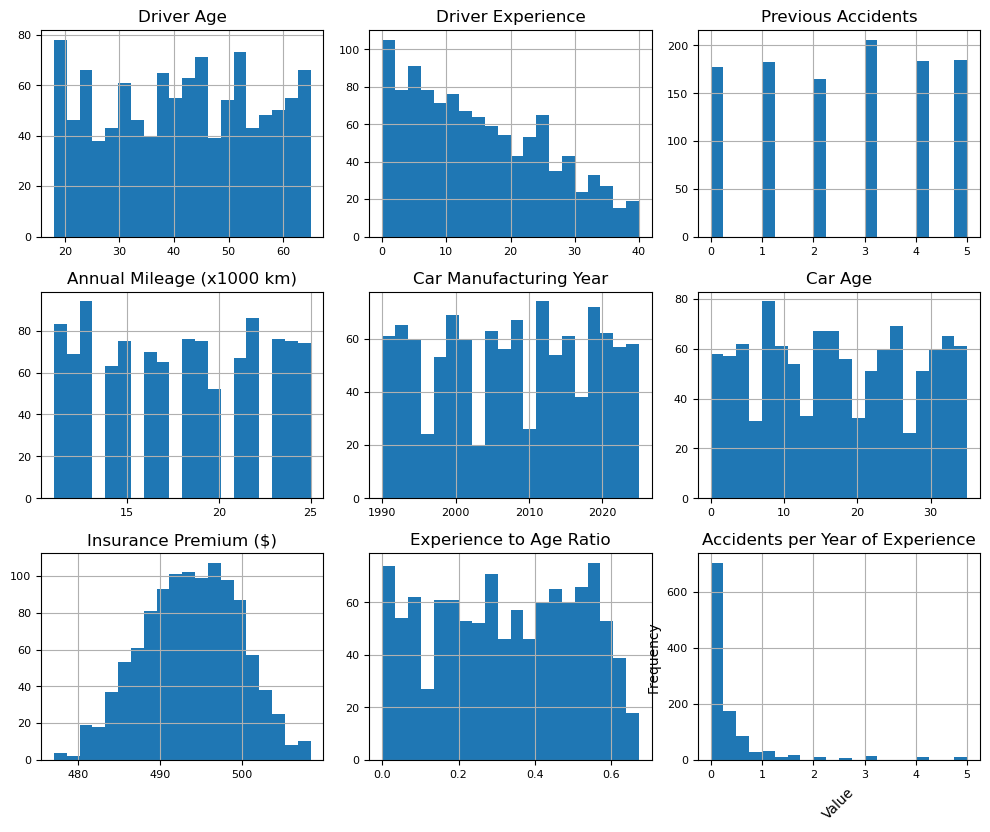

In [15]:
df[num_cols].hist(figsize=(10, 8), bins=20, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.xlabel('Value', fontsize=10 , rotation=45)
plt.ylabel('Frequency', fontsize=10)
plt.show()

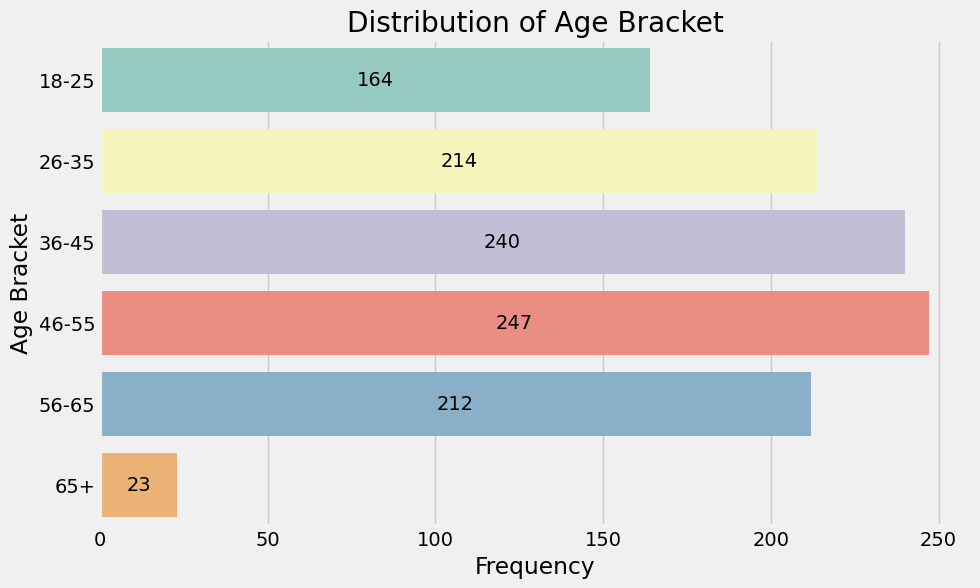

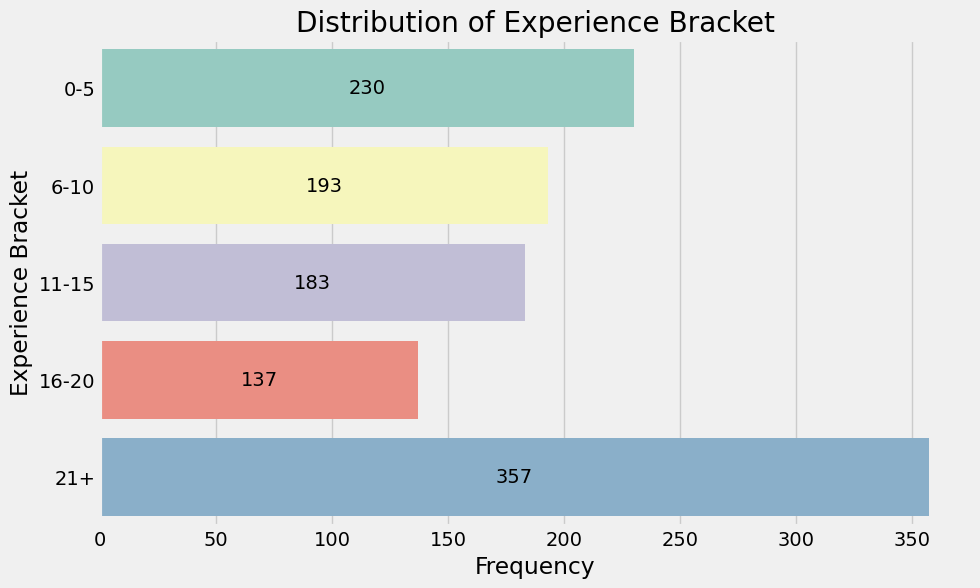

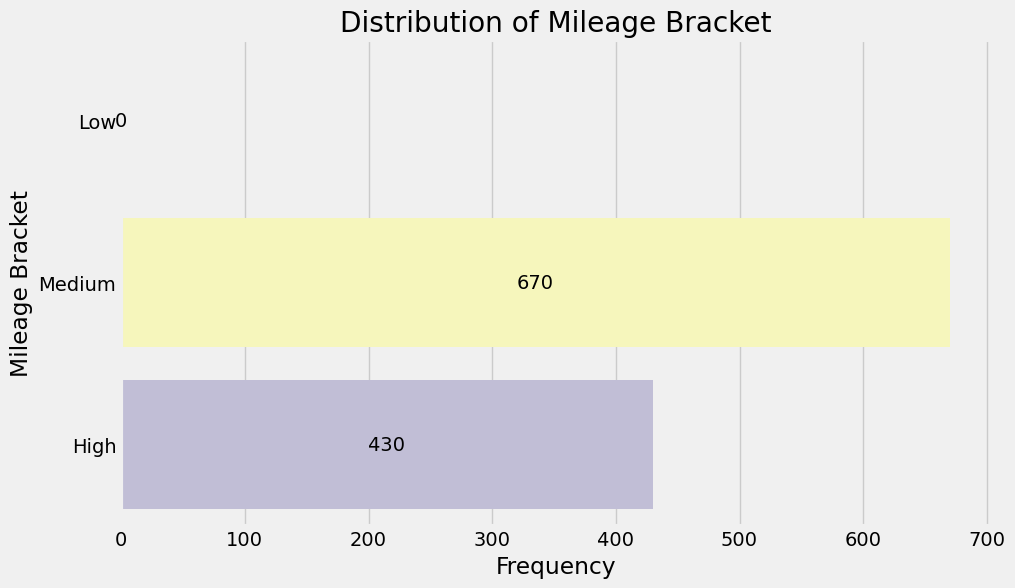

In [16]:
for col in cat_cols :
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10,6))
    count_prim = df[col].value_counts()
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, palette="Set3")
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Frequency')

    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center")

    plt.show()

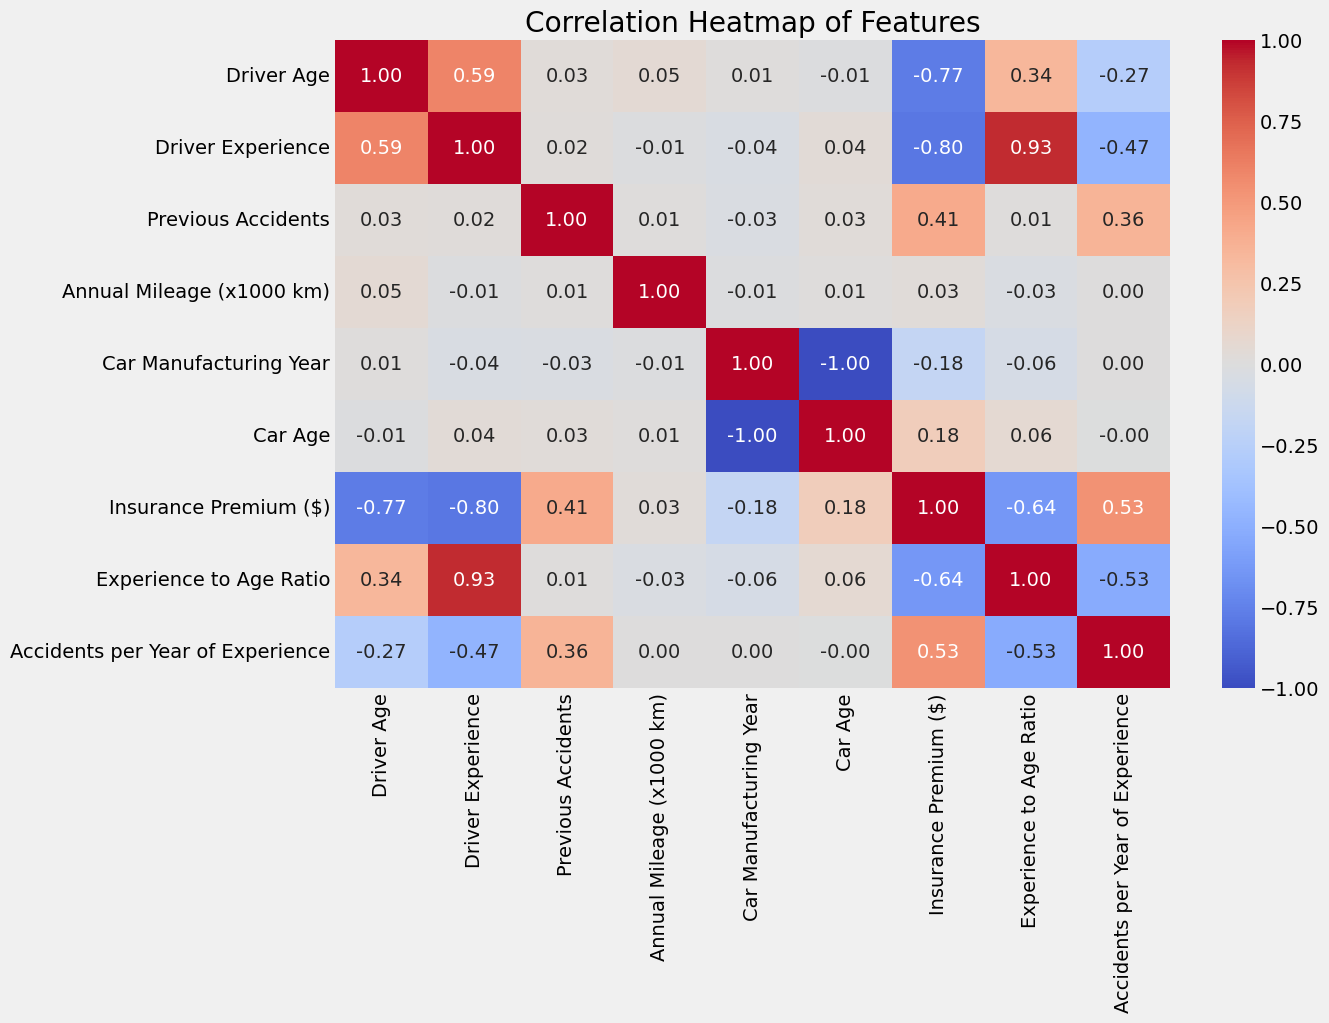

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

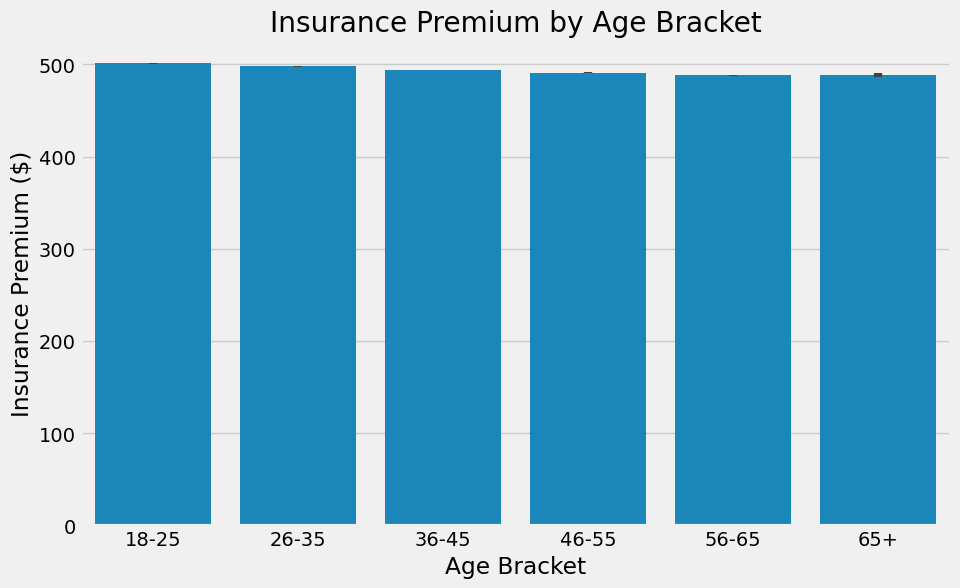

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Bracket', y='Insurance Premium ($)', data=df)
plt.title('Insurance Premium by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Insurance Premium ($)')
plt.show()

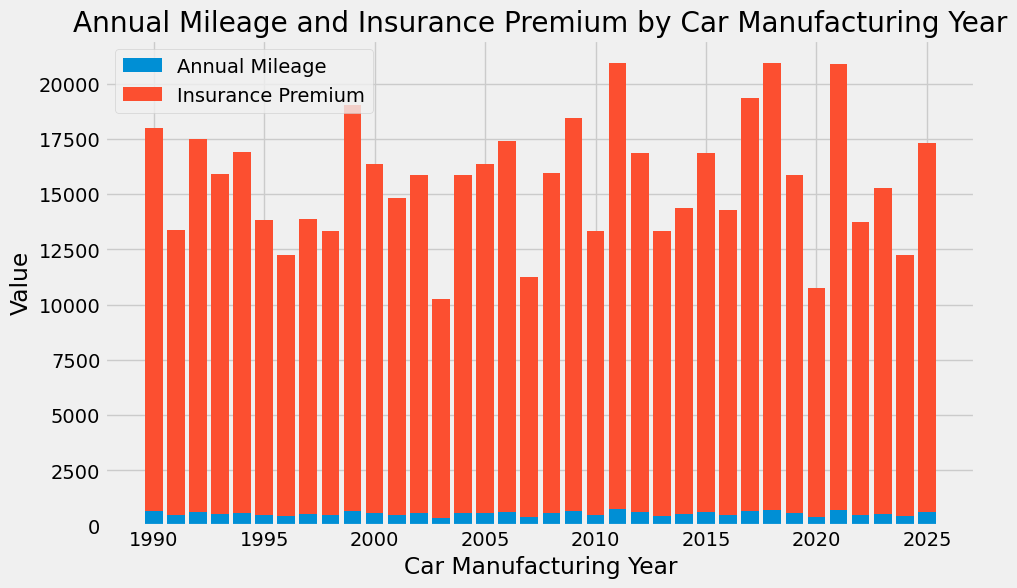

In [19]:
Mileage_df = df.groupby('Car Manufacturing Year')['Annual Mileage (x1000 km)'].sum().reset_index()
Insurance_df = df.groupby('Car Manufacturing Year')['Insurance Premium ($)'].sum().reset_index()

stacked_data = pd.merge(Mileage_df, Insurance_df, on='Car Manufacturing Year')

plt.figure(figsize=(10, 6))
plt.bar(stacked_data['Car Manufacturing Year'], stacked_data['Annual Mileage (x1000 km)'], label='Annual Mileage')
plt.bar(stacked_data['Car Manufacturing Year'], stacked_data['Insurance Premium ($)'], label='Insurance Premium', bottom=stacked_data['Annual Mileage (x1000 km)'])
plt.xlabel('Car Manufacturing Year')
plt.ylabel('Value')
plt.title('Annual Mileage and Insurance Premium by Car Manufacturing Year')
plt.legend()
plt.show()

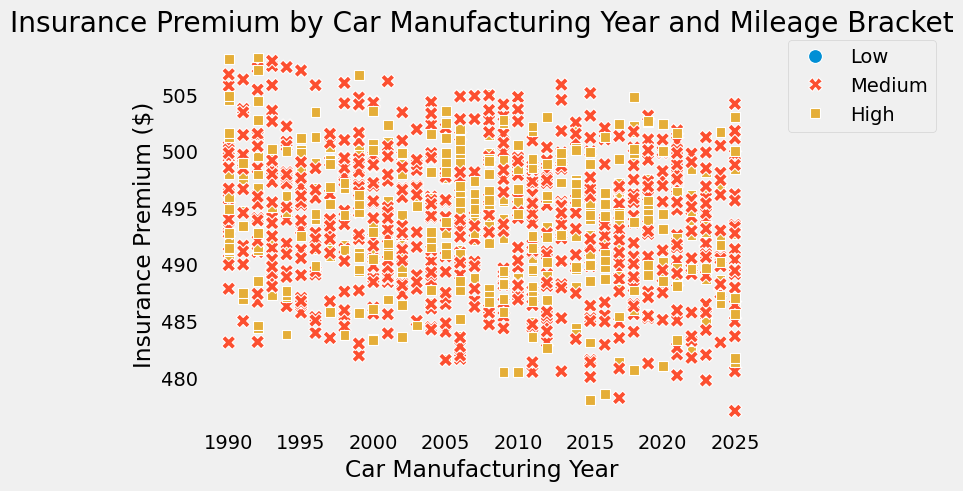

In [20]:
sns.scatterplot(x='Car Manufacturing Year', y='Insurance Premium ($)', data=df , hue='Mileage Bracket', style='Mileage Bracket', s=100 , style_order=['Low', 'Medium', 'High'])
plt.title('Insurance Premium by Car Manufacturing Year and Mileage Bracket')
plt.xlabel('Car Manufacturing Year')
plt.ylabel('Insurance Premium ($)')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

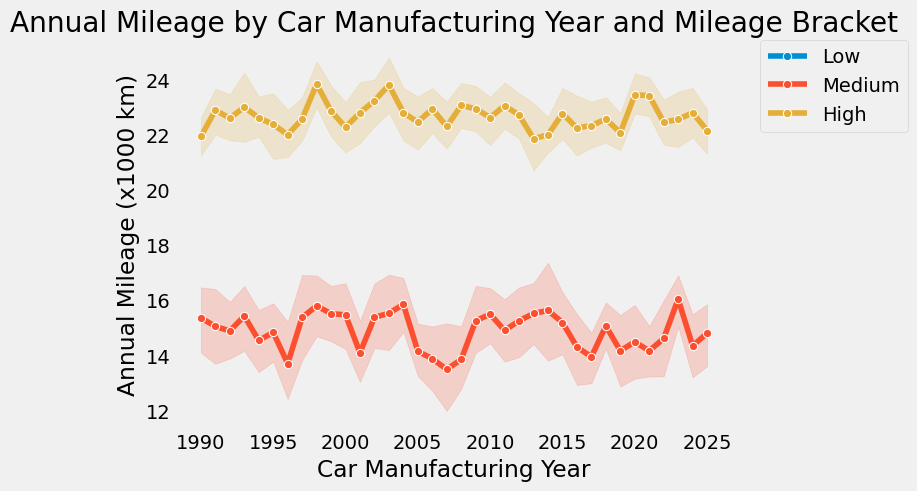

In [21]:
sns.lineplot(x='Car Manufacturing Year', y='Annual Mileage (x1000 km)', data=df, hue='Mileage Bracket', marker='o')
plt.title('Annual Mileage by Car Manufacturing Year and Mileage Bracket')
plt.xlabel('Car Manufacturing Year')
plt.ylabel('Annual Mileage (x1000 km)')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

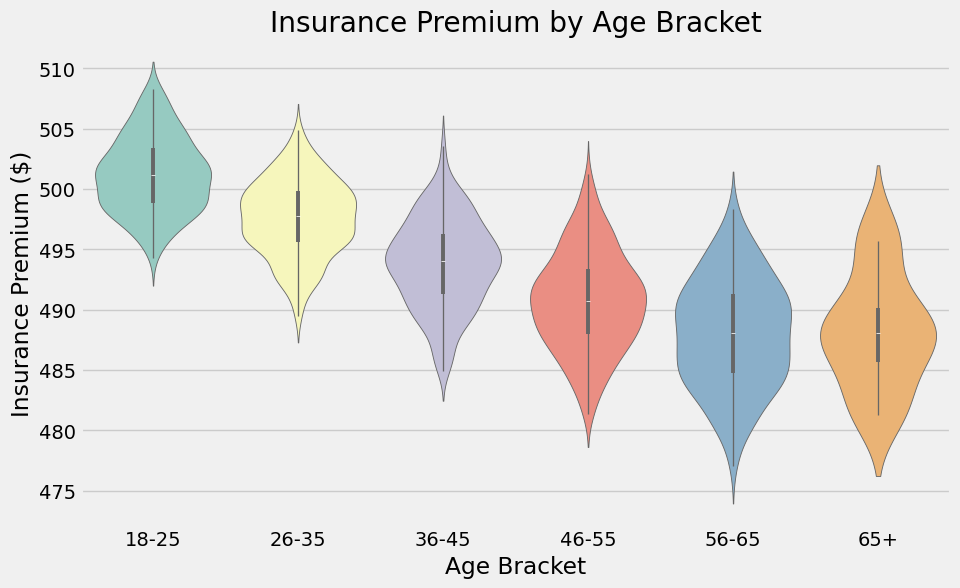

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age Bracket', y='Insurance Premium ($)', data=df , palette='Set3')
plt.title('Insurance Premium by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Insurance Premium ($)')
plt.show()

Text(0, 0.5, 'Insurance Premium ($)')

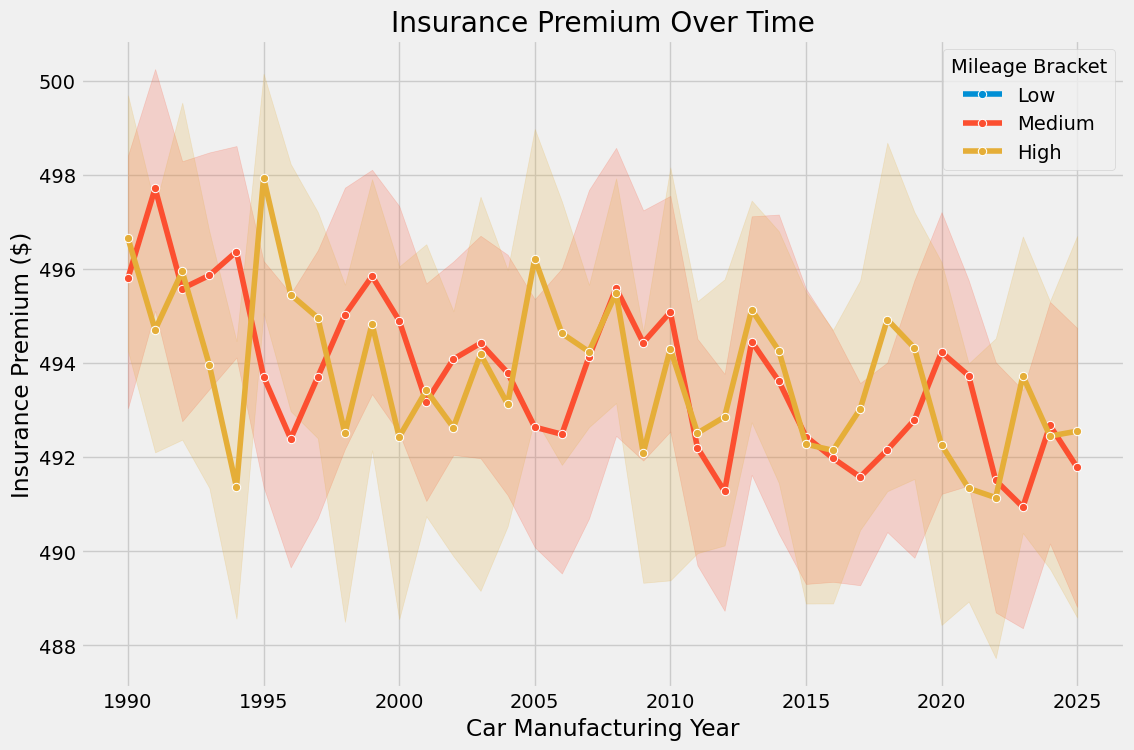

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Car Manufacturing Year' , y='Insurance Premium ($)', hue='Mileage Bracket', marker='o')
plt.title('Insurance Premium Over Time')
plt.xlabel('Car Manufacturing Year')
plt.ylabel('Insurance Premium ($)')

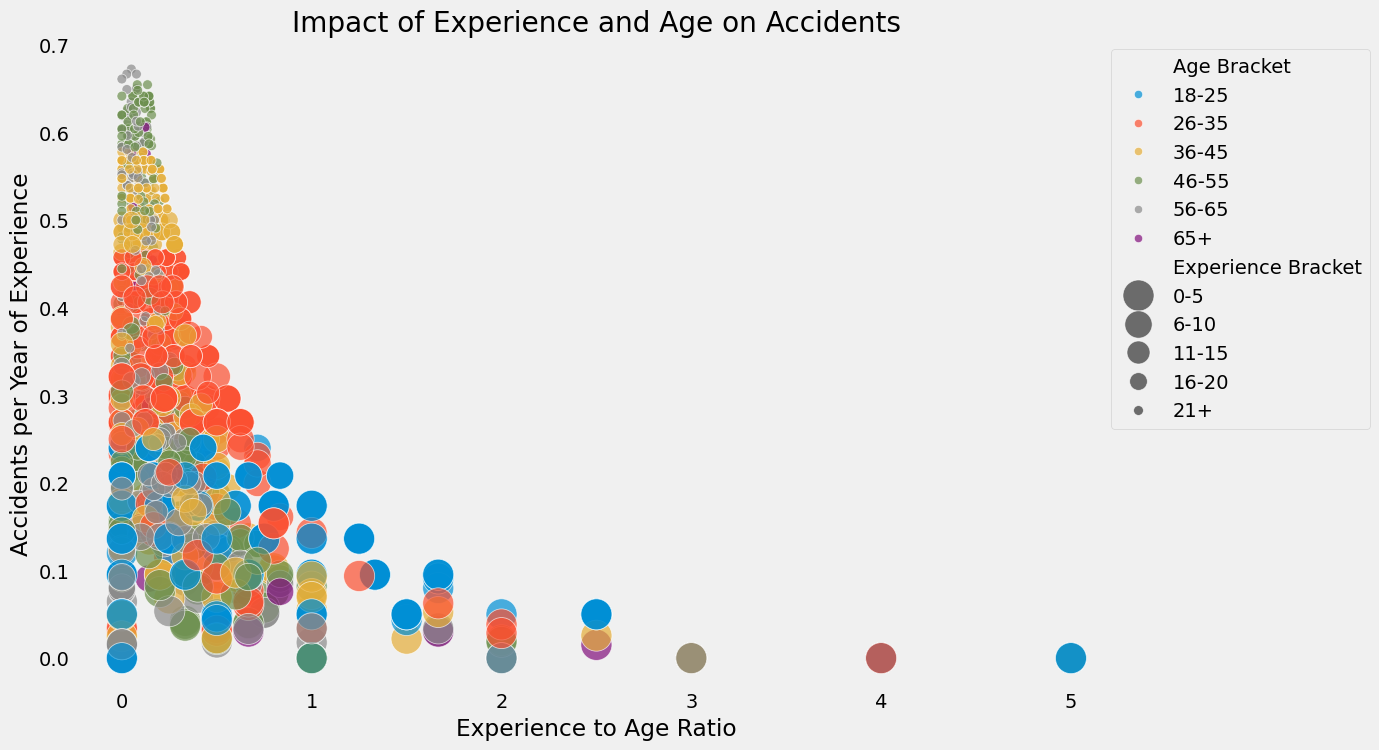

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df , x='Accidents per Year of Experience' , y='Experience to Age Ratio', size='Experience Bracket' , sizes=(50, 500), hue='Age Bracket', alpha=0.7)
plt.title('Impact of Experience and Age on Accidents')
plt.xlabel('Experience to Age Ratio')
plt.ylabel('Accidents per Year of Experience')
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 1))
plt.grid()
plt.show()

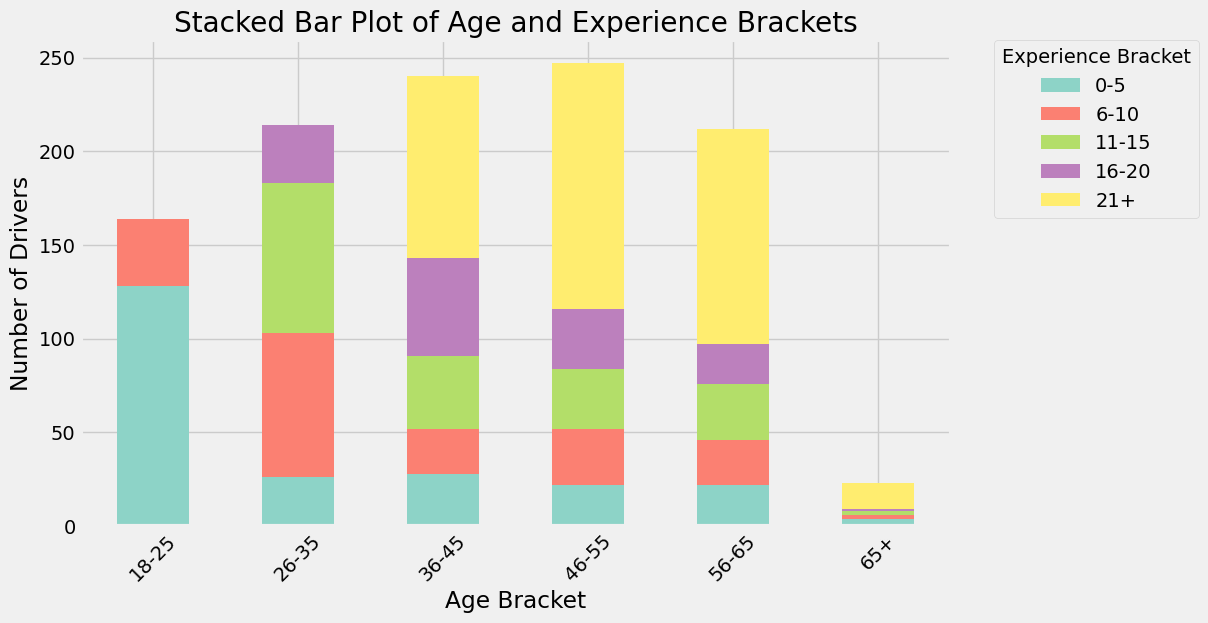

In [25]:
Brackets_counts = df.groupby(['Age Bracket', 'Experience Bracket']).size().unstack(fill_value=0)
Brackets_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Stacked Bar Plot of Age and Experience Brackets')
plt.xlabel('Age Bracket')
plt.ylabel('Number of Drivers')
plt.legend(title='Experience Bracket' , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

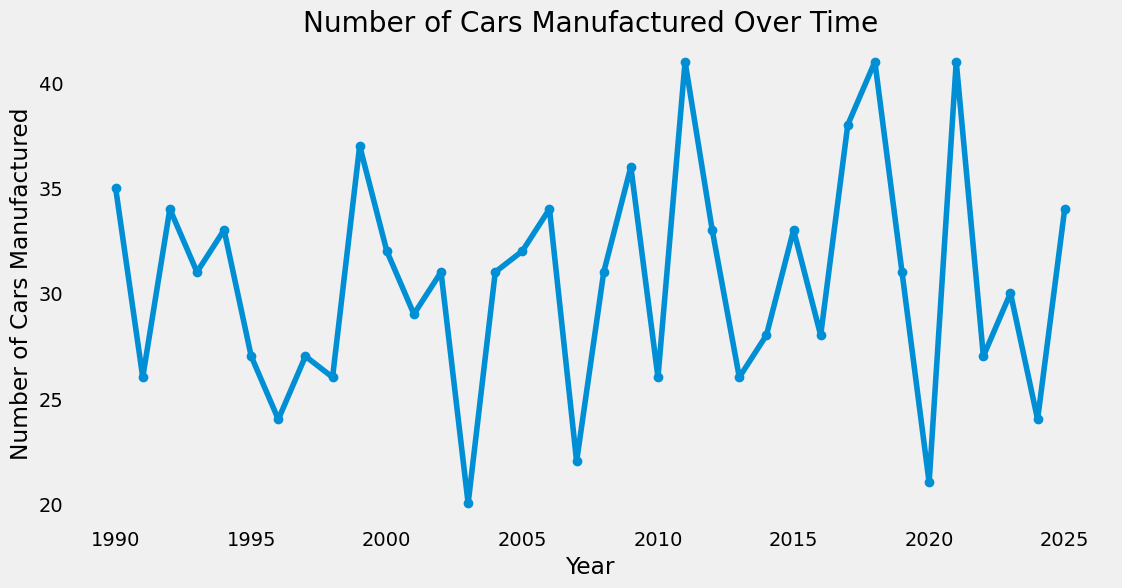

In [26]:
Manufacture_count_per_year = df['Car Manufacturing Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
Manufacture_count_per_year.plot(kind='line', marker='o')
plt.title('Number of Cars Manufactured Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cars Manufactured')
plt.grid()
plt.show()

In [27]:
df['Accidents per Year of Experience'] = np.log1p(df['Accidents per Year of Experience'])

In [29]:
df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($),Experience to Age Ratio,Accidents per Year of Experience,Age Bracket,Experience Bracket,Mileage Bracket
0,56,32,4,17,2002,23,488.35,0.561404,0.114410,56-65,21+,Medium
1,46,19,0,21,2025,0,486.15,0.404255,0.000000,46-55,16-20,High
2,32,11,4,15,2020,5,497.55,0.333333,0.287682,26-35,11-15,Medium
3,60,0,4,19,1991,34,498.35,0.000000,1.609438,56-65,0-5,Medium
4,25,7,0,13,2005,20,495.55,0.269231,0.000000,26-35,6-10,Medium


In [30]:
le_cols = ['Age Bracket' , 'Experience Bracket','Mileage Bracket']
le= LabelEncoder()
for col in le_cols:
  df[col] = le.fit_transform(df[col])

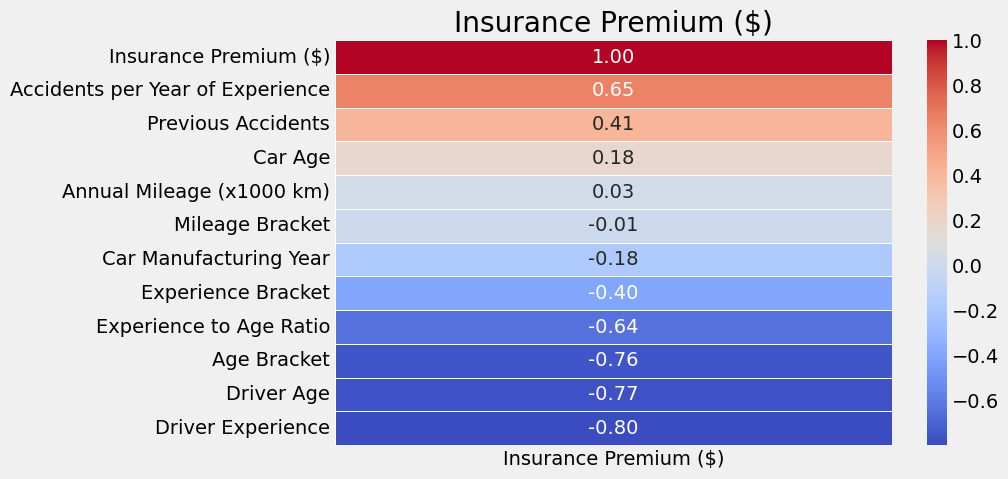

In [31]:
correlation_matrix = df.corr(numeric_only=True)
correlation_price = correlation_matrix['Insurance Premium ($)'].sort_values(ascending=False).head(15)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_price.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Insurance Premium ($)')
plt.show()

In [32]:
threshold = 0.1

correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Insurance Premium ($)"]) > threshold].tolist()
high_corr_features.remove("Insurance Premium ($)")
print(high_corr_features)

['Driver Age', 'Driver Experience', 'Previous Accidents', 'Car Manufacturing Year', 'Car Age', 'Experience to Age Ratio', 'Accidents per Year of Experience', 'Age Bracket', 'Experience Bracket']


In [33]:
X_selected = df[high_corr_features]
Y = df['Insurance Premium ($)']

In [34]:
X_train = X_selected[:len(train)]
X_test = X_selected[len(test):]
y_train = Y[:len(train)]
y_test = Y[len(test):]

In [35]:
model1 = LinearRegression()
model1.fit(X_train , y_train)

LinearRegression()

In [36]:
y_pred1 = model1.predict(X_test)

In [37]:
model2 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=2)
model2.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=2)

In [38]:
y_pred2 = model2.predict(X_test)

In [39]:
model3 = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2)
model3.fit(X_train , y_train)

RandomForestRegressor()

In [40]:
y_pred3 = model3.predict(X_test)

In [41]:
model4 = HistGradientBoostingRegressor(learning_rate=0.1 , max_iter=300 , max_leaf_nodes=31)
model4.fit(X_train, y_train)

HistGradientBoostingRegressor(max_iter=300)

In [42]:
y_pred4 = model4.predict(X_test)

In [43]:
model5 = KNeighborsRegressor(n_neighbors=5, p=1, weights='distance')
model5.fit(X_train , y_train)

KNeighborsRegressor(p=1, weights='distance')

In [44]:
y_pred5 = model5.predict(X_test)

In [45]:
model6 = GradientBoostingRegressor(ccp_alpha=0.0, criterion='squared_error',
                                 max_depth=10, max_features=1.0,
                                 max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0,
                                 n_estimators=300, n_iter_no_change=None,
                                 random_state=None, subsample=1.0,
                                 tol=0.0001, validation_fraction=0.1,
                                 verbose=0, warm_start=False)
model6.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', max_depth=10,
                          max_features=1.0, n_estimators=300)

In [46]:
y_pred6 = model6.predict(X_test)

In [47]:
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

for model in [model1, model2, model3, model4, model5 , model6]:
    y_pred = model.predict(X_test)
    mse, r2 = evaluate_model(y_test, y_pred)
    print(f"{model.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2 * 100:.2f}%"+'\n')

LinearRegression
MSE: 0.048230532989501966
R2 Score: 99.86%

DecisionTreeRegressor
MSE: 0.24771605902777802
R2 Score: 99.29%

RandomForestRegressor
MSE: 0.09995800238667452
R2 Score: 99.71%

HistGradientBoostingRegressor
MSE: 0.03273588304549257
R2 Score: 99.91%

KNeighborsRegressor
MSE: 0.27718891162144926
R2 Score: 99.20%

GradientBoostingRegressor
MSE: 0.11001952421250032
R2 Score: 99.68%



In [ ]:
results = []
for model in [model1, model2, model3, model4, model5 , model6]:

    train_mse, train_r2 = evaluate_model(y_train, model.predict(X_train))
    test_mse, test_r2 = evaluate_model(y_test, model.predict(X_test))

    results.append({
        'Model': model.__class__.__name__,
        'Train Score %': round(train_r2*100,2),
        'Test Score %': round(test_r2*100,2) })

results_df = pd.DataFrame(results)
display(results_df)

,Model,Train Score %,Test Score %
0,LinearRegression,99.86,99.86
1,DecisionTreeRegressor,99.68,99.29
2,RandomForestRegressor,99.83,99.71
3,HistGradientBoostingRegressor,99.97,99.91
4,KNeighborsRegressor,100.00,99.20
5,GradientBoostingRegressor,100.00,99.68
